In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ilaks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ilaks\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [51]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# Gensim
import gensim
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
# Spacy for preprocessing
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')


import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from collections import defaultdict
# Code Snippet for Named Entity Barchart
from collections import  Counter
import operator



In [16]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [18]:
jsonData = pd.read_json('News_Category_Dataset.json', lines=True)

In [19]:
jsonData

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


In [20]:
jsonData['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [21]:
jsonData['headline'][8]

"Mike Myers Reveals He'd 'Like To' Do A Fourth Austin Powers Film"

In [22]:
jsonData['short_description'][3960]

'The liquidation could put up to 33,000 U.S. jobs at risk.'

In [34]:
jsonData['Text']= jsonData["headline"].astype(str) +" " + jsonData["short_description"].astype(str)

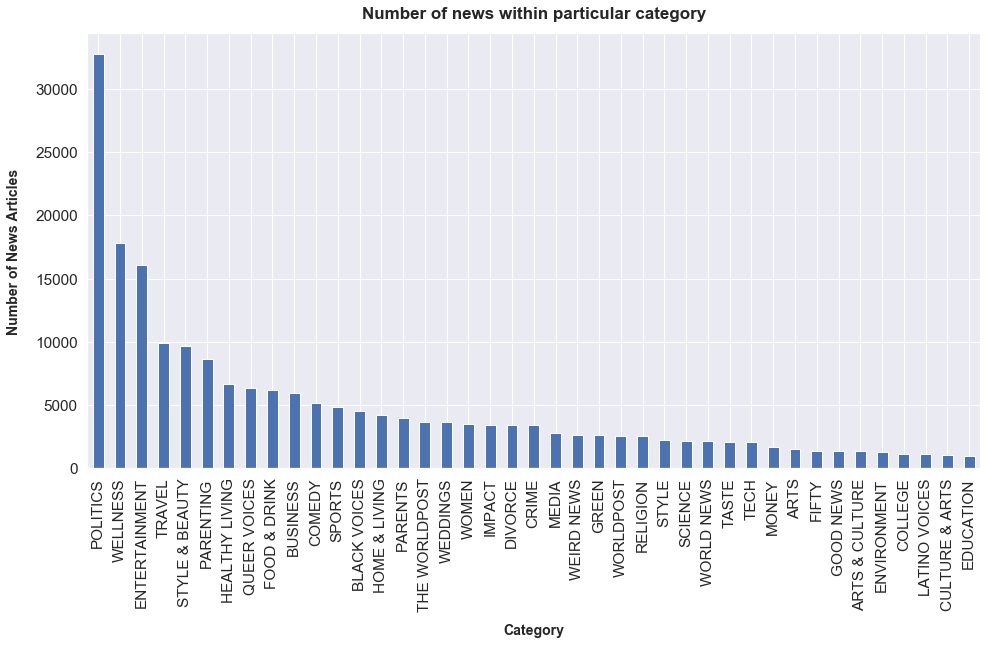

In [23]:
sns.set(font_scale=1.4)
jsonData['category'].value_counts().plot(kind="bar", figsize=(16, 8))
plt.xlabel("Category", labelpad=12, fontsize=14, fontweight="bold")
plt.ylabel("Number of News Articles", labelpad=14, fontsize=14, fontweight="bold")
plt.title("Number of news within particular category", fontsize=17, fontweight="bold", y=1.02);

## Sentiment Analysis

In [69]:
vader_analyzer = SentimentIntensityAnalyzer()
def getPolarity(text):
    stats=vader_analyzer.polarity_scores(text)
    if stats['compound'] >= 0.05 : 
        return 'positive'
  
    elif stats['compound'] <= - 0.05 : 
        return 'negative'
        
    else : 
        return 'neutral'  

In [70]:
jsonData['Sentiment']=jsonData['Text'].apply(getPolarity)

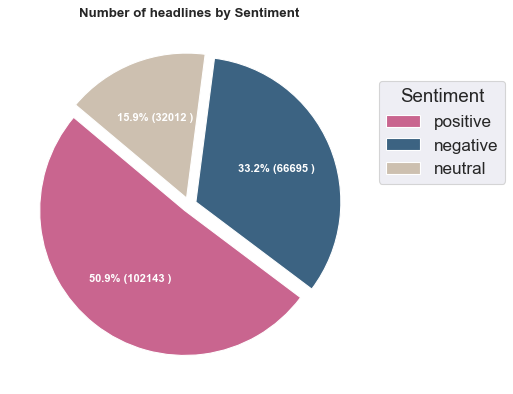

In [109]:
y = jsonData['Sentiment'].value_counts()
mylabels = y.index

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(y, 
                                  autopct=lambda pct: func(pct, y),
                                  textprops=dict(color="w"), 
                                  colors=['#c9658f', '#3c6382', '#cdc0b0'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, mylabels, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of headlines by Sentiment", fontsize=12, fontweight="bold")
plt.show()